# Task 1: Stock Price Prediction

## Bharat Intern

#### Nishu Mishra

### Dataset:

TCS data

In [1]:
import numpy as np
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('TCS.csv')

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4139 non-null   object 
 1   Symbol              4139 non-null   object 
 2   Series              4139 non-null   object 
 3   Prev Close          4139 non-null   float64
 4   Open                4139 non-null   float64
 5   High                4139 non-null   float64
 6   Low                 4139 non-null   float64
 7   Last                4139 non-null   float64
 8   Close               4139 non-null   float64
 9   VWAP                4139 non-null   float64
 10  Volume              4139 non-null   int64  
 11  Turnover            4139 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4139 non-null   int64  
 14  %Deliverble         4139 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 485.2

In [5]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,2456.000000,4.139000e+03,4139.000000
mean,1693.843549,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.952102e+14,85502.709283,8.952206e+05,0.549429
std,722.879316,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.849370e+14,56031.488595,8.637908e+05,0.132867
min,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370237e+12,1219.000000,7.765000e+03,0.121400
25%,1106.250000,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050834e+14,46749.500000,4.334740e+05,0.459100
50%,1633.500000,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.824973e+14,68901.000000,7.052640e+05,0.553800
75%,2326.125000,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455393e+14,110630.250000,1.136132e+06,0.646850
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+16,542541.000000,3.155626e+07,0.962200


In [6]:
df.isnull()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4135,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4136,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4137,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

## Exploratory Data Analysis

Text(0, 0.5, 'Prices ($)')

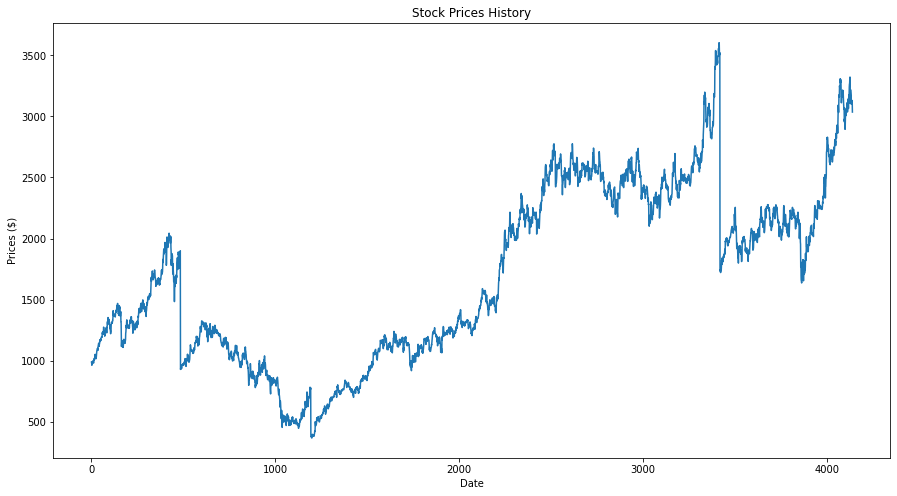

In [8]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

<Axes: >

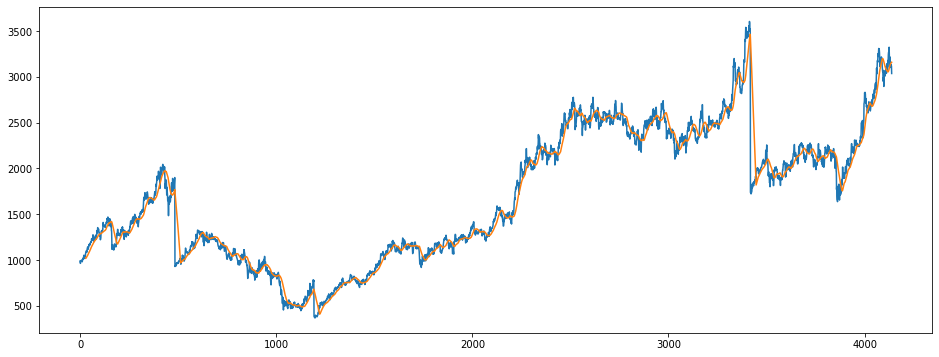

In [9]:
# Rolling mean
df.rolling(7).mean().head(15)
df['Close'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Open'].plot()

In [10]:
#Pie chart
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

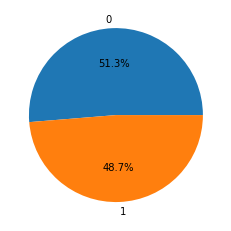

In [11]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

## Data Scaling

In [12]:
df1 = df.reset_index()['Close']

### Normalizing The Dataset

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.19193401],
       [0.18916915],
       [0.18411826],
       ...,
       [0.85184041],
       [0.84910644],
       [0.82451615]])

## Data Preprocessing

In [14]:
train_size = int(len(df1)*0.75)
test_size = len(df1) - train_size
train_size, test_size

(3104, 1035)

In [15]:
# Modelling
train_data, test_data = df1[0:train_size: ], df1[train_size:len(df1), :1]

In [16]:
def create_dataset(dataset, time_step = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
    return numpy.array(data_x), numpy.array(data_y)

In [17]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [18]:
x_train

array([[0.19193401, 0.18916915, 0.18411826, ..., 0.28773111, 0.28614016,
        0.28722139],
       [0.18916915, 0.18411826, 0.19156331, ..., 0.28614016, 0.28722139,
        0.27698058],
       [0.18411826, 0.19156331, 0.19198035, ..., 0.28722139, 0.27698058,
        0.27716594],
       ...,
       [0.62756213, 0.6284889 , 0.63930122, ..., 0.63255124, 0.63007986,
        0.63238133],
       [0.6284889 , 0.63930122, 0.63526977, ..., 0.63007986, 0.63238133,
        0.64290017],
       [0.63930122, 0.63526977, 0.63982639, ..., 0.63238133, 0.64290017,
        0.63058958]])

In [19]:
x_test

array([[0.6317017 , 0.65341901, 0.65590584, ..., 0.62674349, 0.6307286 ,
        0.64347168],
       [0.65341901, 0.65590584, 0.64861525, ..., 0.6307286 , 0.64347168,
        0.64195796],
       [0.65590584, 0.64861525, 0.65272393, ..., 0.64347168, 0.64195796,
        0.65632289],
       ...,
       [0.72718988, 0.71453947, 0.7291052 , ..., 0.85020312, 0.84733013,
        0.8446425 ],
       [0.71453947, 0.7291052 , 0.73613321, ..., 0.84733013, 0.8446425 ,
        0.8542809 ],
       [0.7291052 , 0.73613321, 0.72374539, ..., 0.8446425 , 0.8542809 ,
        0.85184041]])

In [20]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

## Stacked LSTM Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

from keras.layers import Dropout,  Bidirectional

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (time_step,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Fitting the Model

In [24]:
model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test), verbose=1)
model.evaluate(x_test,y_test)

Epoch 1/10
94/94 [==============================] - 28s 164ms/step - loss: 0.0083 - val_loss: 0.0036
Epoch 2/10
94/94 [==============================] - 10s 107ms/step - loss: 7.1694e-04 - val_loss: 0.0034
Epoch 3/10
94/94 [==============================] - 8s 86ms/step - loss: 7.0810e-04 - val_loss: 0.0033
Epoch 4/10
94/94 [==============================] - 8s 85ms/step - loss: 6.3814e-04 - val_loss: 0.0031
Epoch 5/10
94/94 [==============================] - 8s 85ms/step - loss: 6.0247e-04 - val_loss: 0.0028
Epoch 6/10
94/94 [==============================] - 8s 83ms/step - loss: 5.8287e-04 - val_loss: 0.0025
Epoch 7/10
94/94 [==============================] - 8s 89ms/step - loss: 5.2212e-04 - val_loss: 0.0024
Epoch 8/10
94/94 [==============================] - 9s 94ms/step - loss: 5.5745e-04 - val_loss: 0.0019
Epoch 9/10
94/94 [==============================] - 9s 94ms/step - loss: 4.4138e-04 - val_loss: 0.0018
Epoch 10/10
30/30 [==============================] - 1s 30ms/step - loss:

0.0029379765037447214

## Prediction

In [25]:
#LSTM Prediction
test_predict = model.predict(x_test)
train_predict = model.predict(x_train)

94/94 [==============================] - 3s 27ms/step


In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[back:len(train_predict)+back, :] = train_predict

In [28]:
# Test predictions
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(back*2)+1:len(df1)-1, :] = test_predict

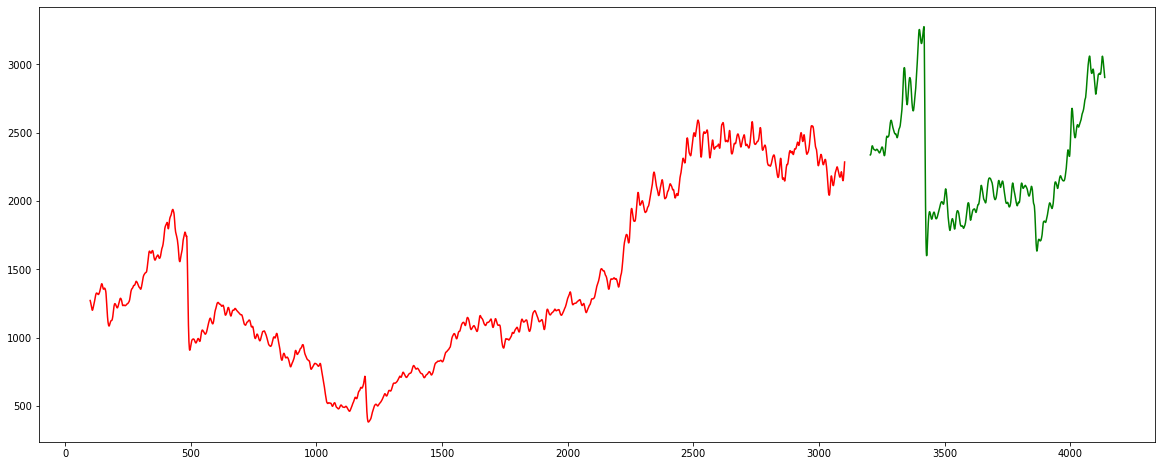

In [29]:
plt.subplots(figsize=(20,8))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

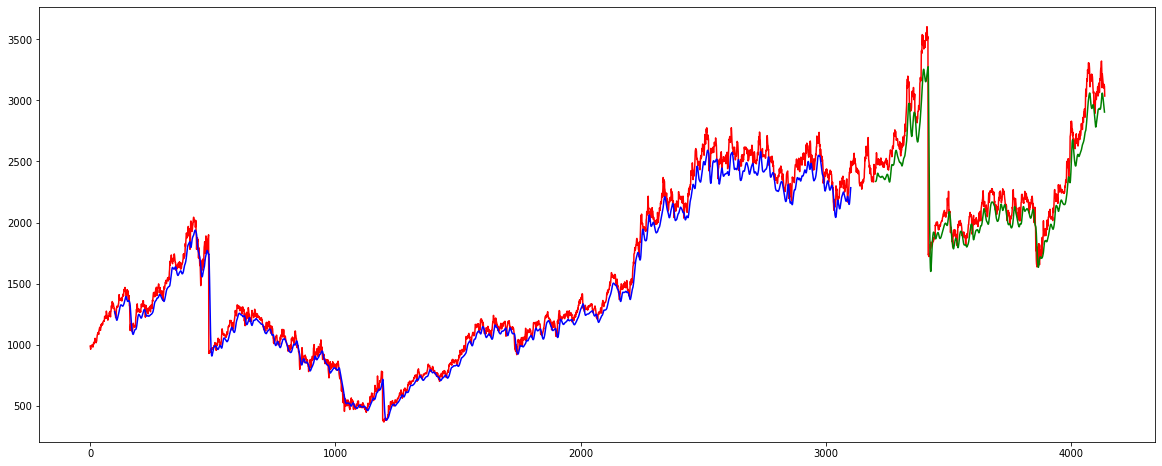

In [30]:
# Baseline and predictions
plt.subplots(figsize=(20,8))
plt.plot(scaler.inverse_transform(df1), color = 'red')
plt.plot(trainPredictPlot, color = 'blue')
plt.plot(testPredictPlot, color = 'green')
plt.show()

<Axes: >

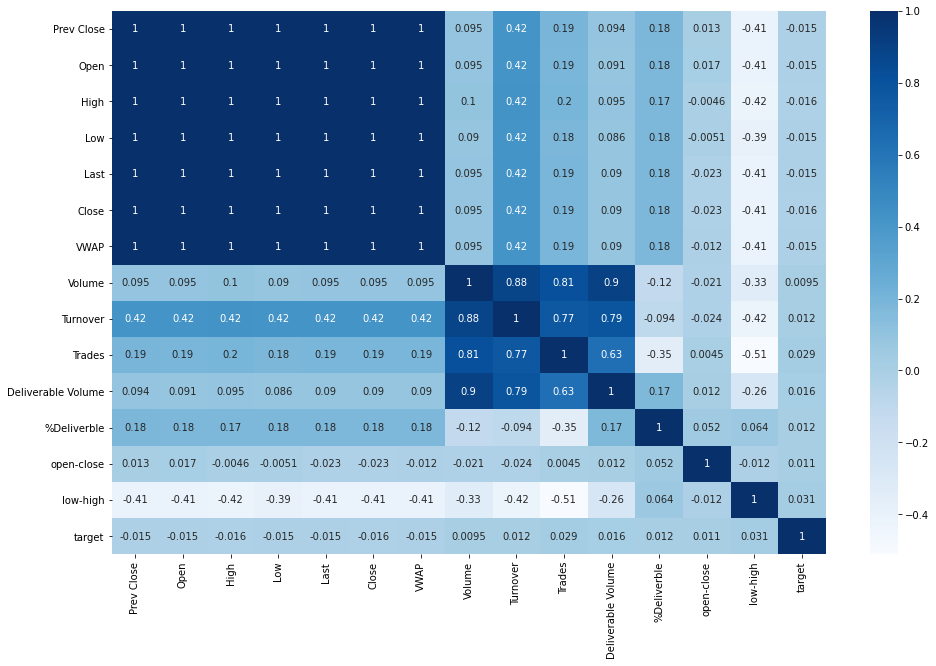

In [31]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

<Axes: >

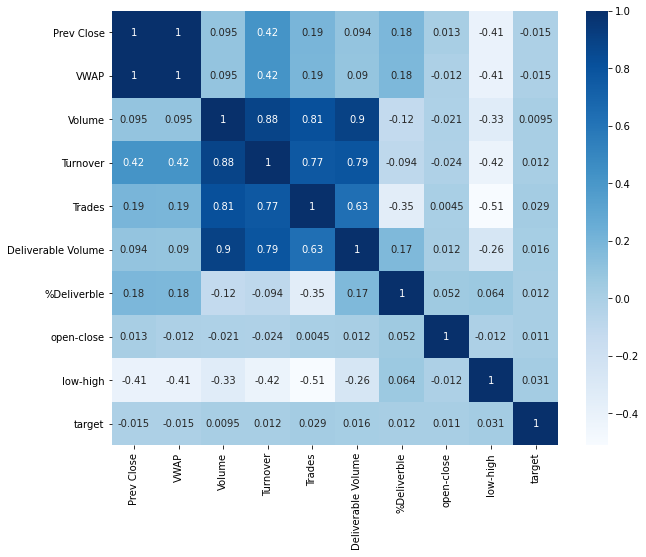

In [32]:
data2 = df.copy()
data2 = data2.drop(['Open','High','Low','Last', 'Close'],axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(data2.corr(),cmap='Blues',annot=True)

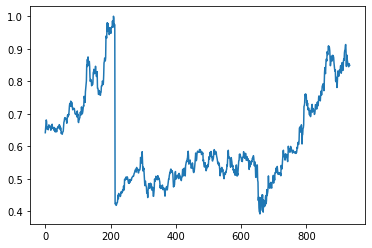

In [33]:
plt.plot(y_test)

94/94 [==============================] - 3s 29ms/step


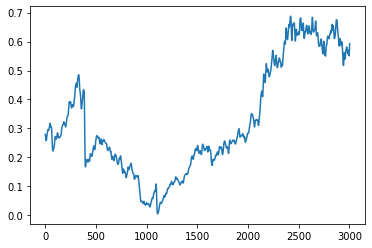

In [34]:
plt.plot(model.predict(x_train))

30/30 [==============================] - 1s 34ms/step


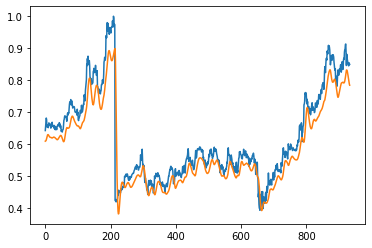

In [35]:
plt.plot(y_test)
plt.plot(model.predict(x_test))

## Confusion Matrix

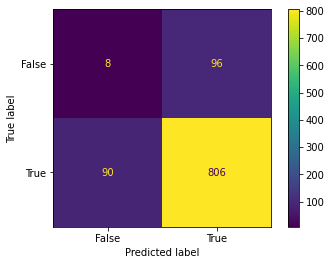

In [36]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()